# Load Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
import time
from matplotlib.colors import LinearSegmentedColormap
from itertools import cycle
from pandas.api.types import CategoricalDtype
from collections import defaultdict

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

import warnings
warnings.filterwarnings("ignore")

C:\Users\leech\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\leech\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)

# Load Data

In [3]:
df = pd.read_csv('All_Joined.csv')

In [4]:
df.head(2)

,Unnamed: 0,Unnamed: 0.1,Accessorial Miscellaneous Customer,Average Sales Cycle,Active Opportunites Count,Existing Sales Initiative,# Activity in Last 90Days,Annual Revenue,Billing State/Province,Product Commercial Customer,DnB Base Year Sales Qty,DnB Bus Num Of Clients,DnB Bus Property Size,DnB Bus State Province Name,DnB Bus Total Gross Revenue,DnB Primary NAICS Industry Sub Segment Level2 Description,DnB Primary SIC Industry 4 Description,Deferred Air Customer,Activity exists in Last 90Days,Lost Opps exist in Last 90Days,Won Opps exist in Last 90Days,Ground CWT Customer,Account ID,Industry,Industry Updated,Number of Preceding Account Tasks,# Lost Opps in Last 90Days,Next Day Air Customer,Residential Customer,Spend Scope,State/Province,Competitor Non Addressable,Competitor Spend,Customer Spend,TCS.UPS_Revenue_Manual__c,US Miscellaneous Competitor Spend,US Miscellaneous CustomerSpend,TCS_US_Access.UPS_Revenue_Manual__c,US Air Competitor Spend,US Air Customer Spend,US Air UPS Revenue,US Ground Competitor Spend,US Ground Customer Spend,US Ground UPS Revenue,International Competitor Spend,International Customer Spend,TCS_US_Intl.UPS_Revenue_Manual__c,UPS SurePost Customer,USPK Competitor Spend,USPK Customer Spend,USPK Spend Scope,USPK UPS Spend,US International IFC Customer,VNR.Rev_Net_USD,VNR.Volume_Qty,WW Economy Customer,WW Expedited Transborder Customer,WW Express Freight Customer,WW Express Freight IFC Customer,WW Express Saver Customer,Window Won,# Won Opps in Last 90Days,iparcel Select Customer,Prod_1_Rev_Net_USD,Prod_3_Rev_Net_USD,Prod_27_Rev_Net_USD,Prod_33_Rev_Net_USD,Prod_35_Rev_Net_USD,Prod_38_Rev_Net_USD,Prod_79_Rev_Net_USD,Prod_102_Rev_Net_USD,Prod_117_Rev_Net_USD,Prod_118_Rev_Net_USD,Prod_126_Rev_Net_USD,Prod_352_Rev_Net_USD,Prod_360_Rev_Net_USD,Prod_1_Volume_Qty,Prod_3_Volume_Qty,Prod_27_Volume_Qty,Prod_33_Volume_Qty,Prod_35_Volume_Qty,Prod_38_Volume_Qty,Prod_79_Volume_Qty,Prod_102_Volume_Qty,Prod_117_Volume_Qty,Prod_118_Volume_Qty,Prod_126_Volume_Qty,Prod_352_Volume_Qty,Prod_360_Volume_Qty,Prod_577_Rev_Net_USD,Prod_577_Volume_Qty,Id
0,0,0,Yes,0.00,0.00,No,0,0,Texas,Yes,0,0,0,NaN,0.00,NaN,NaN,Yes,No,No,No,No,0012A00001wR97TQAS,Industrial Products,Industrial Products,0,0,Yes,Yes,0.00,TEXAS,0.00,0.00,0,0.00,$0.00,$0.00,0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,0.00,No,0.00,0.00,0.00,0.00,No,14004.99,806.00,No,No,No,No,No,No,0,No,17943.93,0.00,1739.45,0.00,3636.37,1803.94,0.00,0.00,0.00,0.00,0.00,1018.74,0.00,1311.00,0.00,0.00,0.00,55.00,72.00,0.00,0.00,0.00,0.00,0.00,62.00,0.00,0.00,0.00,0012A00001wR97TQAS
1,1,1,Yes,0.00,0.00,No,0,0,Arizona,Yes,0,0,0,NaN,0.00,NaN,NaN,Yes,No,No,No,No,0012A00001wR97cQAC,Apparel and Consumer Goods,Apparel and Consumer Goods,0,0,Yes,Yes,0.00,ARIZONA,0.00,0.00,0,0.00,$0.00,$0.00,0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,0.00,No,0.00,0.00,0.00,0.00,No,9742.68,405.00,No,No,No,No,No,No,0,No,9925.79,0.00,1421.72,0.00,1507.20,639.12,0.00,0.00,0.00,0.00,0.00,1652.73,0.00,591.00,0.00,0.00,0.00,9.00,9.00,0.00,0.00,0.00,0.00,0.00,73.00,0.00,0.00,0.00,0012A00001wR97cQAC


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 92 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Unnamed: 0                                                 10000 non-null  int64  
 1   Unnamed: 0.1                                               10000 non-null  int64  
 2   Accessorial Miscellaneous Customer                         10000 non-null  object 
 3   Average Sales Cycle                                        10000 non-null  float64
 4   Active Opportunites Count                                  10000 non-null  float64
 5   Existing Sales Initiative                                  10000 non-null  object 
 6   # Activity in Last 90Days                                  10000 non-null  int64  
 7   Annual Revenue                                             10000 non-null  int64  
 8   Billing

* All data from 2019
* All account-level data
* Window Won = yes or no, did this account sign a contract with UPS in 2019
* In general, we should have competitor spend + UPS spend = Customer Spend

In [6]:
cols = list(df.columns.values)[:]
for i,col in enumerate(cols):
    print(i+1,col,"----",len(df[col].unique()),df[col].unique()[0:5])

1 Unnamed: 0 ---- 10000 [0 1 2 3 4]
2 Unnamed: 0.1 ---- 10000 [0 1 2 3 4]
3 Accessorial Miscellaneous Customer ---- 2 ['Yes' 'No']
4 Average Sales Cycle ---- 567 [0.000e+00 3.000e+00 1.500e+01 1.578e+03 1.000e+00]
5 Active Opportunites Count ---- 11 [0. 1. 2. 8. 6.]
6 Existing Sales Initiative ---- 2 ['No' 'Yes']
7 # Activity in Last 90Days ---- 12 [0 1 2 4 3]
8 Annual Revenue ---- 1 [0]
9 Billing State/Province ---- 56 ['Texas' 'Arizona' nan 'Arkansas' 'North Carolina']
10 Product Commercial Customer ---- 2 ['Yes' 'No']
11 DnB Base Year Sales Qty ---- 2625 [       0  2302644  8061618 13445879   750000]
12 DnB Bus Num Of Clients ---- 145 [   0  200 2600 2000   40]
13 DnB Bus Property Size ---- 471 [    0  8913 24000  7200  4000]
14 DnB Bus State Province Name ---- 52 [nan 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'NORTH CAROLINA']
15 DnB Bus Total Gross Revenue ---- 3443 [ 0.000000e+00 -1.000000e+13  2.127273e+06  8.061618e+06  3.520600e+04]
16 DnB Primary NAICS Industry Sub Segment Level2 Des

## EDA

<b> Check whether there is duplicated account </b>

In [7]:
df['Account ID'].duplicated().any()

False

<b> Compare the accounts </b>

In [8]:
df.groupby(['Product Commercial Customer', 'Residential Customer']).size()

Product Commercial Customer  Residential Customer
No                           No                       636
                             Yes                       72
Yes                          No                      1437
                             Yes                     7855
dtype: int64

<i> Should the customers with 2x No be dropped? No ,these products are not really for sale because we cannot force the customer to ship residential only or otherwise. </i> 

<b> Check the differences between 'DnB Bus State Province Name', 'State/Province' </b>

In [9]:
# Check on same account, and for all data point
# How many missing data in each one
# Pick the most reliable, and fill in the null with second reliable

In [10]:
df[['State/Province', 'Billing State/Province', 'DnB Bus State Province Name']].loc[df['State/Province'].str.lower() != df['Billing State/Province'].str.lower()]

,State/Province,Billing State/Province,DnB Bus State Province Name
2,ARIZONA,NaN,ARIZONA
3,ARIZONA,NaN,ARIZONA
4,ARIZONA,NaN,ARIZONA
6,ARIZONA,NaN,ARIZONA
7,CALIFORNIA,NaN,CALIFORNIA
...,...,...,...
7030,NaN,NaN,NaN
7032,NaN,NaN,NaN
7033,TEXAS,NaN,TEXAS
7034,NaN,NaN,NaN


<b> Check the differences between 'NAICS', 'SIC' </b>

In [11]:
l11 = df['DnB Primary NAICS Industry Sub Segment Level2 Description'].str.lower().unique().tolist()
l12 = df['DnB Primary SIC Industry 4 Description'].str.lower().unique().tolist()

In [12]:
len(l11)

89

In [13]:
len(l12)

663

In [14]:
r1 = [x for x in l11 + l12 if x not in l12]
print(r1)

['industrial distributor', 'automotive sales & distribution', 'wholesale', 'non-targeted', 'fabricated materials', 'regulated', 'miscellaneous', 'general', 'general merchandise stores', 'insurance carriers', 'engineering, architecture, & research', 'animal health', 'other services', 'telecom and broadcasting services', 'apparel retailers', 'banking and credit unions', 'healthcare providers excluding some', 'furnishings', 'chemicals', 'dealerships', 'fulfillment', 'eating and drinking', 'specialty retail', 'raw materials manufacturing', 'management, scientific, & tech consulting', 'construction', 'hotels and lodging', 'real estate', 'high tech stores', 'medical device & supplies general', 'printing', 'automotive related services', 'specialty schools', 'industrial assemblies and machinery', 'clinical trials', 'food', 'higher education', 'tier 1 - 5 parts manufacturing', 'data and systems services', 'manufacturing', 'oil and gas', 'building materials and hardware', 'tourism', 'pharma', 'a

<i> Too many categories in SIC Industry 4 (i.e. beet sugar vs sugarcane and sugar beets) </i>

<b> Check the differences between 'Industry', 'Industry Updated' </b>

In [15]:
l21 = df['Industry'].str.lower().unique().tolist()
l22 = df['Industry Updated'].str.lower().unique().tolist()

In [16]:
print(l21)

['industrial products', 'apparel and consumer goods', 'diversified vehicles & parts', 'high tech', 'professional services', 'government', 'healthcare', 'other', 'not available']


In [17]:
print(l22)

['industrial products', 'apparel and consumer goods', 'diversified vehicles & parts', 'high tech', 'professional services', 'government', 'healthcare', 'other', 'miscellaneous']


In [18]:
r2 = [x for x in l21 + l22 if x not in l21 or x not in l22]
print(r2)

['not available', 'miscellaneous']


<i> Nothing major here, but it can be seen that 'DnB Primary NAICS Industry Sub Segment Level2 Description' is good enough </i>

Combine Other and not available. Use One-hot for feature engineering (If not using NAICS)

<b> Check for missing values </b>

In [19]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({"column name": df.columns, "missing%": percent_missing}).reset_index(drop=True)
missing_value_df.sort_values("missing%", inplace=True, ascending=False)
# display the missing percentage
missing_value_df = missing_value_df[missing_value_df['missing%']>0].reset_index(drop=True)
display(missing_value_df)

,column name,missing%
0,DnB Bus State Province Name,40.15
1,DnB Primary NAICS Industry Sub Segment Level2 ...,40.15
2,DnB Primary SIC Industry 4 Description,40.15
3,Billing State/Province,32.24
4,State/Province,12.32
5,Prod_577_Volume_Qty,0.19
6,Prod_577_Rev_Net_USD,0.19


<i> Will select NAICS column && separate State and Country into 2 columns </i> +

Most reliable State/Province

<b> Check for Yes/No Ratio per product </b>

<span> List of Product (Unsure its category)

<ul>
    <li>Ground CWT  </li>
    <li>Deferred Air  </li>
    <li>Next Day Air  </li>
    <li>iparcel Select  </li>
    <li>US International IFC  </li>
</ul> 
<ul>    
    <li>WW Economy  </li>
    <li>WW Expedited Transborder  </li>
    <li>WW Express Freight  </li>
    <li>WW Express Freight IFC  </li>
    <li>WW Express Saver  </li>
</ul>      
</span>

In [20]:
df2 = df[['Deferred Air Customer'
          ,'Ground CWT Customer'
          ,'Next Day Air Customer'
          ,'UPS SurePost Customer'
          ,'US International IFC Customer'
          ,'WW Economy Customer'
          ,'WW Expedited Transborder Customer'
          ,'WW Express Freight Customer'
          ,'WW Express Freight IFC Customer'
          ,'WW Express Saver Customer'
          ,'iparcel Select Customer'
          ,'Window Won']]

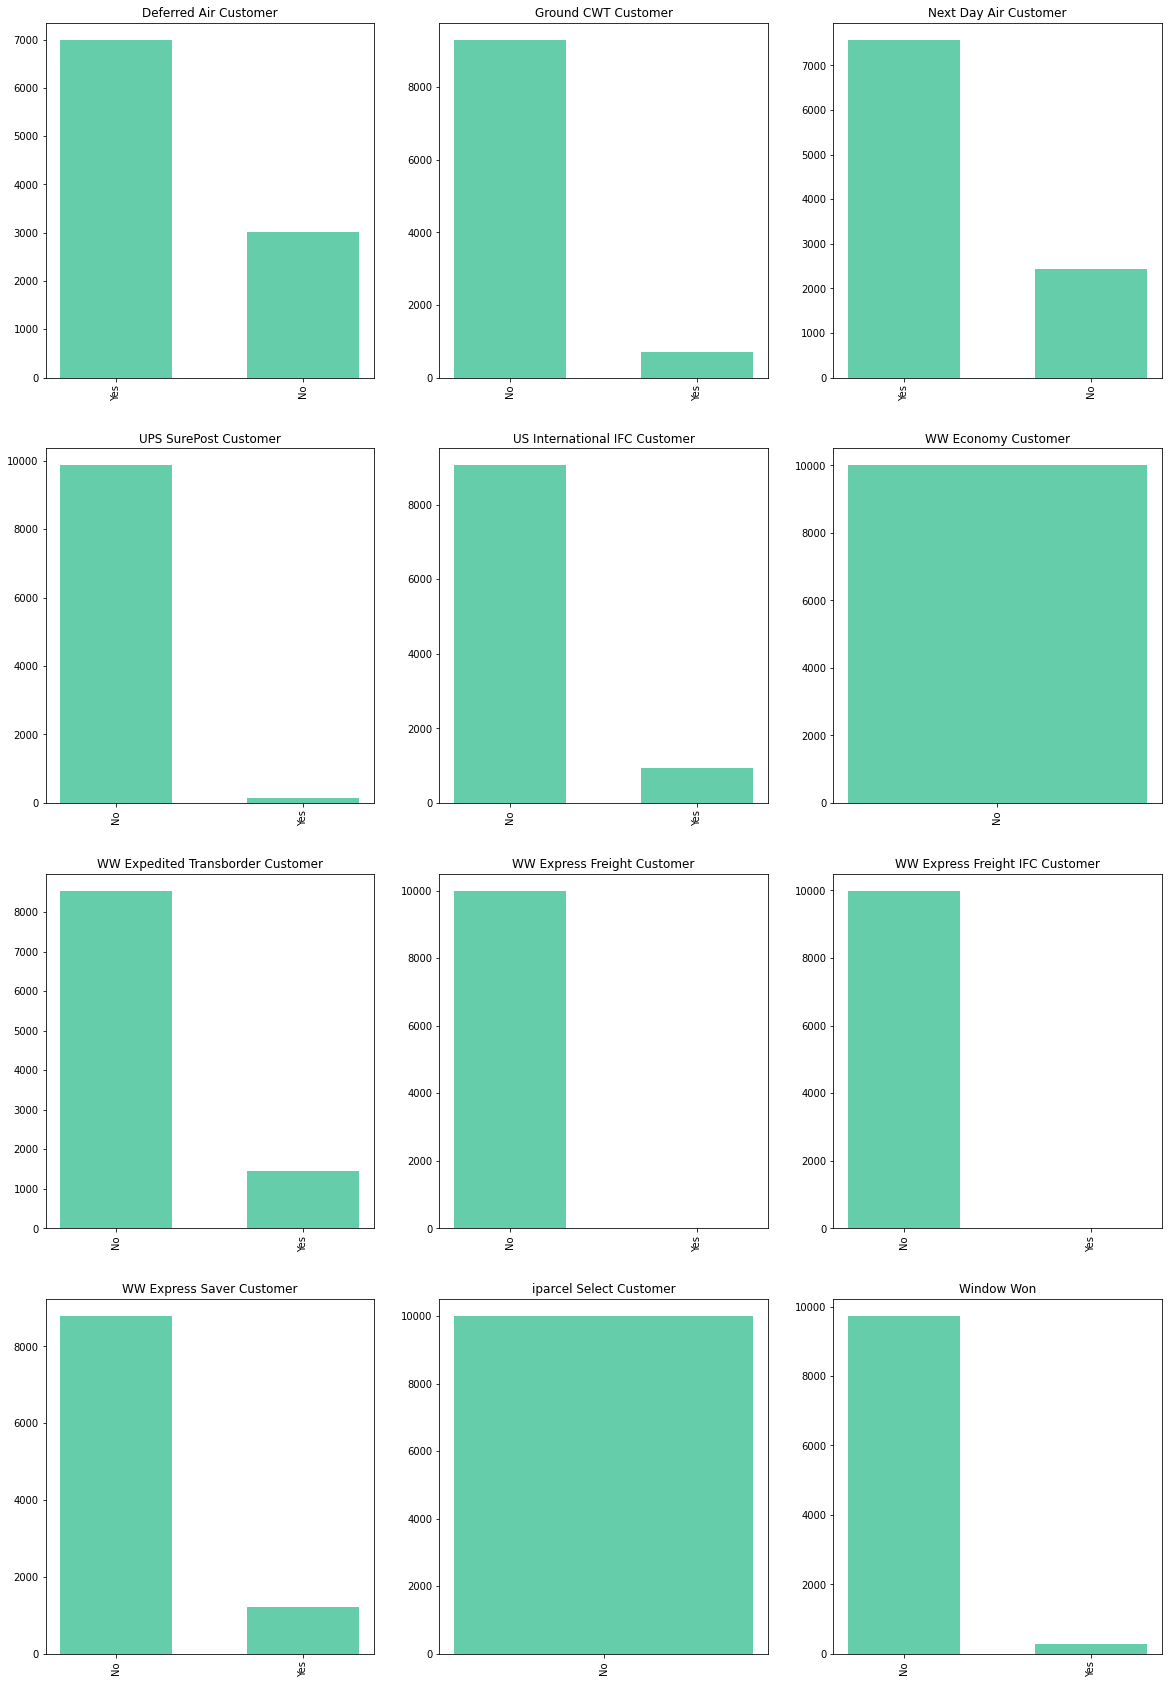

In [21]:
fig, axes = plt.subplots(4,3,sharex=False,sharey=False,figsize=(20,30))
counter=0
for cat_col in df2:
    if cat_col in df2.columns.values:
        value_counts = df[cat_col].value_counts()
        trace_x = counter // 3
        trace_y = counter % 3
        x_pos = np.arange(0, len(value_counts))
        axes[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label=value_counts.index, color="MediumAquaMarine", width=0.6)
        axes[trace_x, trace_y].set_title(cat_col)
        for tick in axes[trace_x, trace_y].get_xticklabels():
            tick.set_rotation(90)
        counter += 1
plt.show()

<li><i> Most customers have deferred air and next day air </i>
<li><i> Most customers do not have iparcel select, WW Express Freight (and IFC), WW Economy </i>


Average Sale Cycle (Set to 60), Total Gross Revenue, VNR.Volume_Qty, UPS Spend (Set to 0) 

<b> Each Product versus Window Won </b>

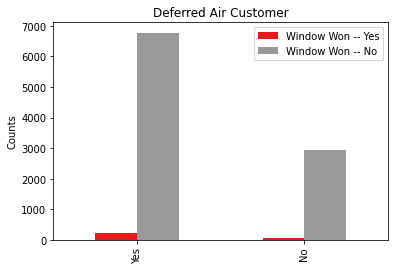

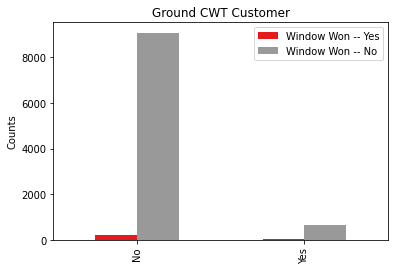

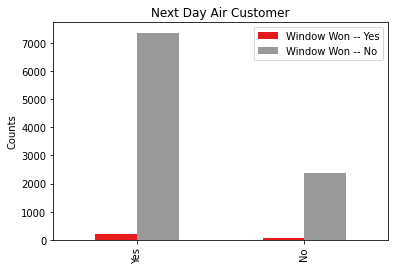

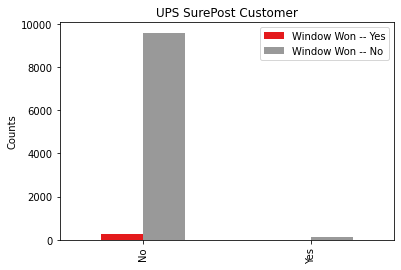

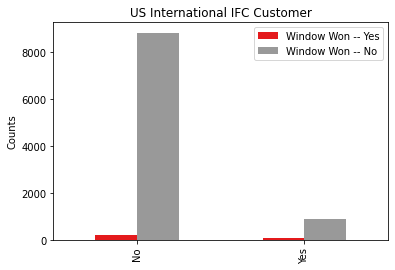

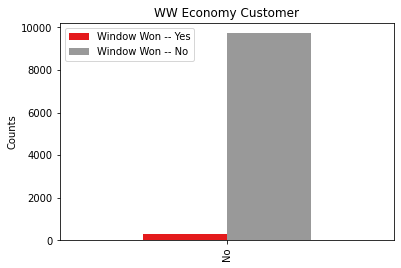

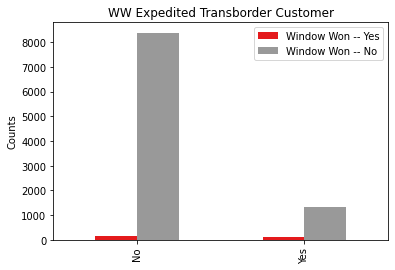

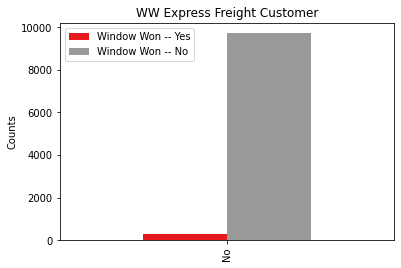

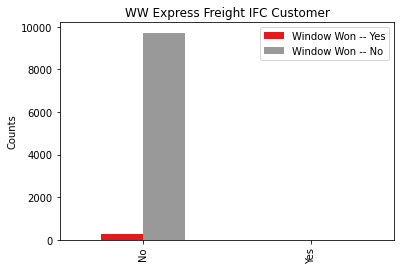

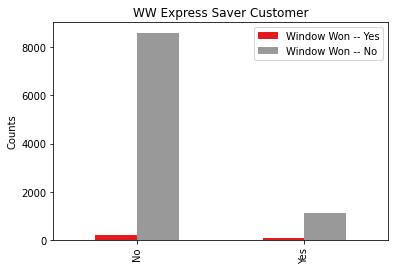

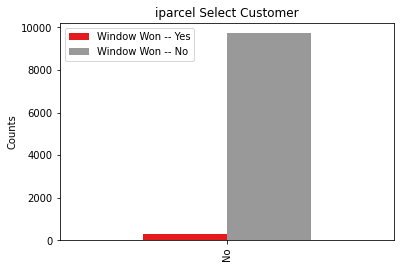

In [22]:
for col in df2:
    if col == "Window Won":
        pass
    else:
        c_df = pd.DataFrame()
        c_df["Window Won -- Yes"] = df2[df2["Window Won"] == "Yes"][col].value_counts()
        c_df["Window Won -- No"] = df2[df2["Window Won"] == "No"][col].value_counts()
        fig = c_df.plot.bar(title=col,logy=False,colormap='Set1')
        fig.set_ylabel("Counts")
        

Window Won in Yes - Does that mean the salesperson ask the customer for the same product again?

<b> Check for correlation with new df</b>

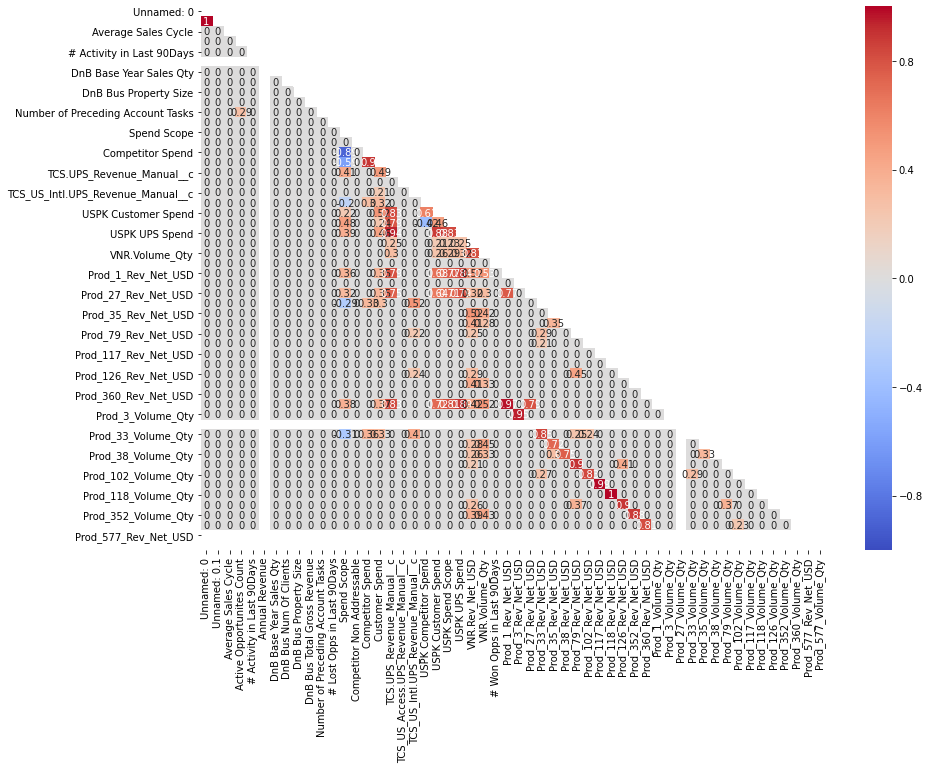

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)

subjective_corr = df.corr()
mask = np.zeros_like(subjective_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
subjective_corr[np.abs(subjective_corr)<.2] = 0

sns.heatmap(subjective_corr,
            vmin = -1,
            cmap = 'coolwarm',
            annot = True,
            mask = mask);

# Clean Data & Feature Selection

<b> Replace Null value in State/Province </b>

In [24]:
# Replace NaN in State/Province
# Either with DnB Bus State Province Name or Billing State/Province 
# Or set as "Unknown"

In [25]:
# There was a NoneType conflict result from NaN so I changed to String value called NA
df.fillna({'State/Province' : 'NA',
           'DnB Bus State Province Name': 'NA',
           'Billing State/Province': 'NA'}, inplace=True)

In [26]:
df[['State/Province','DnB Bus State Province Name','Billing State/Province']].head()

,State/Province,DnB Bus State Province Name,Billing State/Province
0,TEXAS,NA,Texas
1,ARIZONA,NA,Arizona
2,ARIZONA,ARIZONA,NA
3,ARIZONA,ARIZONA,NA
4,ARIZONA,ARIZONA,NA


In [27]:
df['State/Province'] = np.where(df['State/Province'] == 'NA',                   # If Col1 contains NA value
                          np.where(df['DnB Bus State Province Name'] == 'NA',   # Replace with Col2 but if Col2 contains NA value
                                   df['Billing State/Province'],                # Replace Col2 with Col3
                                   df['DnB Bus State Province Name']),          # Else keep value of Col2 and replace for Col1
                                   df['State/Province'])                        # It will not change if the value is not NA at that row

In [28]:
# The left over NA will be assigned as "Unknown"
df['State/Province'] = np.where(df['State/Province'] == 'NA', 'UNKNOWN', df['State/Province'])

In [29]:
# Convert to all uppercases
df['State/Province'] = df['State/Province'].str.lower() 

In [30]:
# Make sure all rows are filled 
sum(df['State/Province'] == 'NA')

0

In [31]:
df['State/Province'].tail(10)

9990        california
9991             texas
9992             texas
9993          delaware
9994    north carolina
9995    north carolina
9996    north carolina
9997          maryland
9998        washington
9999         minnesota
Name: State/Province, dtype: object

In [32]:
# How many accounts with Unknown location?
print ("Number of accounts:", df.shape[0])

print ("Number of Uknown:", sum(df['State/Province'] == 'UNKNOWN'))

print ("The difference:", (df.shape[0] - sum(df['State/Province'] == 'UNKNOWN')))

Number of accounts: 10000
Number of Uknown: 0
The difference: 10000


<b> Drop the features </b>

In [33]:
whole_df = df.drop([ 'Unnamed: 0' ,                                 # Just an index
                     'Id',                                          # Will join this id back later
                     'Account ID',                                  # or this
                     'Accessorial Miscellaneous Customer',          # This is not something we can recommend to customers
                     'Residential Customer',                        # We cannot decide whether customers should ship residential products
                     'Product Commercial Customer',                 # We cannot decide whether customers should ship commercial products
                     'Billing State/Province',                      # Combined with State/Province column 
                     'DnB Bus State Province Name',                 # Combined with State/Province column
                     'DnB Primary SIC Industry 4 Description',      # Decided to use NAICS over SIC for industry code
                     'Industry',                                    # Decided to use NAICS
                     'Industry Updated',                            # Decided to use NAICS
                     'Spend Scope',                                 # Decided to use DnB Bus Total Gross Revenue
                     'Annual Revenue',                              # Decided to use DnB Bus Total Gross Revenue
                     'DnB Bus Property Size',                       # Not sure if it has enough data to check the similarity at the account-level
                    
                     'TCS.UPS_Revenue_Manual__c',                   # Not sure what it is but it is manually inputted
                     'TCS_US_Access.UPS_Revenue_Manual__c',         # Not sure what it is but it is manually inputted
                     'TCS_US_Intl.UPS_Revenue_Manual__c',           # Not sure what it is but it is manually inputted
                     
                     'Average Sales Cycle',                         # Does not have influence in recommendation
                     'Active Opportunites Count',                   # Does not have influence in recommendation
                     'Existing Sales Initiative',                   # Does not have influence in recommendation
                     '# Activity in Last 90Days',                   # Does not have influence in recommendation
                     'Activity exists in Last 90Days',              # Does not have influence in recommendation
                     'Lost Opps exist in Last 90Days',              # Does not have influence in recommendation
                     'Won Opps exist in Last 90Days',               # Does not have influence in recommendation
                     'Number of Preceding Account Tasks',           # Does not have influence in recommendation
                     '# Lost Opps in Last 90Days',                  # Does not have influence in recommendation
                     '# Won Opps in Last 90Days',                   # Does not have influence in recommendation
                    
                     'USPK Spend Scope',                            # Use VnR data instead
                     'USPK UPS Spend',                              # Use VnR data instead
                     'USPK Customer Spend',                         # Use VnR data instead
                     'US Air Customer Spend',                       # Use VnR data instead
                     'US Ground Customer Spend',                    # Use VnR data instead
                     'International Customer Spend',                # Use VnR data instead
                     'US Miscellaneous CustomerSpend',              # Use VnR data instead
                     'VNR.Rev_Net_USD',                             # Use VnR data instead
                     'VNR.Volume_Qty',                              # Use VnR data instead
                     'US Air UPS Revenue',                          # Use VnR data instead
                     'US Ground UPS Revenue',                       # Use VnR data instead
                    
                     'US Miscellaneous Competitor Spend',           # This product is not part of the recommender
                     'Competitor Non Addressable',                  # Does not influence the model
            
                     
                     'Deferred Air Customer',                       # Will use spending instead of binary values
                     'Ground CWT Customer',                         # Will use spending instead of binary values
                     'Next Day Air Customer',                       # Will use spending instead of binary values
                     'UPS SurePost Customer',                       # Will use spending instead of binary values
                     'US International IFC Customer',               # Will use spending instead of binary values
                     'WW Economy Customer',                         # Will use spending instead of binary values
                     'WW Expedited Transborder Customer',           # Will use spending instead of binary values
                     'WW Express Freight Customer',                 # Will use spending instead of binary values
                     'WW Express Freight IFC Customer',             # Will use spending instead of binary values
                     'WW Express Saver Customer',                   # Will use spending instead of binary values
                     'iparcel Select Customer',                     # Will use spending instead of binary values
                     'Window Won'                                   # Target of PTW PTB model. Not recommender
                   ], axis=1)

In [34]:
whole_df.head(5)

,Unnamed: 0.1,DnB Base Year Sales Qty,DnB Bus Num Of Clients,DnB Bus Total Gross Revenue,DnB Primary NAICS Industry Sub Segment Level2 Description,State/Province,Competitor Spend,Customer Spend,US Air Competitor Spend,US Ground Competitor Spend,International Competitor Spend,USPK Competitor Spend,Prod_1_Rev_Net_USD,Prod_3_Rev_Net_USD,Prod_27_Rev_Net_USD,Prod_33_Rev_Net_USD,Prod_35_Rev_Net_USD,Prod_38_Rev_Net_USD,Prod_79_Rev_Net_USD,Prod_102_Rev_Net_USD,Prod_117_Rev_Net_USD,Prod_118_Rev_Net_USD,Prod_126_Rev_Net_USD,Prod_352_Rev_Net_USD,Prod_360_Rev_Net_USD,Prod_1_Volume_Qty,Prod_3_Volume_Qty,Prod_27_Volume_Qty,Prod_33_Volume_Qty,Prod_35_Volume_Qty,Prod_38_Volume_Qty,Prod_79_Volume_Qty,Prod_102_Volume_Qty,Prod_117_Volume_Qty,Prod_118_Volume_Qty,Prod_126_Volume_Qty,Prod_352_Volume_Qty,Prod_360_Volume_Qty,Prod_577_Rev_Net_USD,Prod_577_Volume_Qty
0,0,0,0,0.00,NaN,texas,0.00,0,$0.00,$0.00,$0.00,0.00,17943.93,0.00,1739.45,0.00,3636.37,1803.94,0.00,0.00,0.00,0.00,0.00,1018.74,0.00,1311.00,0.00,0.00,0.00,55.00,72.00,0.00,0.00,0.00,0.00,0.00,62.00,0.00,0.00,0.00
1,1,0,0,0.00,NaN,arizona,0.00,0,$0.00,$0.00,$0.00,0.00,9925.79,0.00,1421.72,0.00,1507.20,639.12,0.00,0.00,0.00,0.00,0.00,1652.73,0.00,591.00,0.00,0.00,0.00,9.00,9.00,0.00,0.00,0.00,0.00,0.00,73.00,0.00,0.00,0.00
2,2,0,0,-9999999999999.99,Industrial Distributor,arizona,0.00,0,$0.00,$0.00,$0.00,0.00,6939.94,0.00,1542.43,0.00,392.89,195.46,0.00,0.00,0.00,0.00,0.00,930.10,0.00,699.00,0.00,0.00,0.00,13.00,8.00,0.00,0.00,0.00,0.00,0.00,60.00,0.00,0.00,0.00
3,3,2302644,200,2127273.00,Automotive Sales & Distribution,arizona,0.00,0,$0.00,$0.00,$0.00,0.00,1543.22,0.00,1070.25,0.00,283.62,58.15,0.00,0.00,0.00,0.00,0.00,130.79,0.00,93.00,0.00,0.00,0.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,7.00,0.00,0.00,0.00
4,4,8061618,2600,8061618.00,Wholesale,arizona,0.00,0,$0.00,$0.00,$0.00,0.00,2471.94,0.00,1208.04,0.00,204.85,90.11,0.00,0.00,0.00,0.00,0.00,263.69,0.00,244.00,0.00,0.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,18.00,0.00,0.00,0.00


<b> Convert Spending values in String to Float </b>

In [35]:
whole_df['US Air Competitor Spend'] = whole_df['US Air Competitor Spend'].str.replace('$', '').str.replace(',', '').astype(float)
whole_df['US Ground Competitor Spend'] = whole_df['US Ground Competitor Spend'].str.replace('$', '').str.replace(',', '').astype(float)
whole_df['International Competitor Spend'] = whole_df['International Competitor Spend'].str.replace('$', '').str.replace(',', '').astype(float)

# Customer Segmentation Clustering

In [36]:
# About the Customer

# 1. DnB Base Year Sales Qty                                             | Number of unit sale by the account
# 2. DnB Bus Num Of Clients                                              | Number of clients each account has
# 3. DnB Bus Total Gross Revenue                                         | How much account makes
# 4. DnB Primary NAICS Industry Sub Segment Level2 Description           | What type of industry
# 5. State/Province                                                      | Where do they locate
# 6. Competitor Spend                                                    | How much account spend on other places
# 7. Customer Spend                                                      | how much customer spend in total

# The product spends are just at UPS. If there's Customer Spend, it should be the total (UPS + Competitor).

## Normalization

In [37]:
customer = whole_df[['DnB Base Year Sales Qty','DnB Bus Num Of Clients',
               'DnB Bus Total Gross Revenue','Competitor Spend','Customer Spend',
                'DnB Primary NAICS Industry Sub Segment Level2 Description', 'State/Province']]

In [38]:
# count negative values and zeros for each numerical column
neg_per, zero_per = [], []
num_cols = [col for col,dt in customer.dtypes.items() if (dt == 'float64' or dt == 'int64')]

for num_col in num_cols:
    num_list = sorted(list(customer[num_col].values))
    neg_count, zero_count = 0, 0
    for i in num_list:
        if i < 0:
            neg_count += 1
        elif i == 0:
            zero_count += 1
    neg_p = round(neg_count/len(num_list)*100,4)
    zero_p = round(zero_count/len(num_list)*100,4)
    neg_per.append(neg_p)
    zero_per.append(zero_p)

count_df = pd.DataFrame(list(zip(num_cols, neg_per, zero_per)), columns =['column name', 'Negative%', 'Zero%']) 
display(count_df)

,column name,Negative%,Zero%
0,DnB Base Year Sales Qty,0.00,62.40
1,DnB Bus Num Of Clients,0.00,89.67
2,DnB Bus Total Gross Revenue,20.36,40.18
3,Competitor Spend,0.00,95.52
4,Customer Spend,0.00,90.73


In [39]:
# https://towardsdatascience.com/transforming-skewed-data-73da4c2d0d16
# Different way of normalizing

def normalize(column):                                    # Normalization converts data to 0-1 but it is still skewed as before.
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

def sigmoid(column):                                      # Data has been distorted. 
    e = np.exp(1)
    y = 1/(1+e**(-column))
    return y

def log(column):                                          # Data contains value less than 0, so log didn't work
    return np.log(column)

def logPlusOne(column):                                   # Change 0 to 1. The range is 0 to 26. Much better.
    return log(column + 1)

def logPlusOne_Normalize(column):                         # After normalizing it, it seems very reasonable.
    return normalize(logPlusOne(column))

def cubeRoot(column):                                     # The range is larger than logPlusOne
    return column**(1/3)

def cubeRoot_Normalize(column):                           # 50% to 75% is too close (0.1 apart) for a 700k dataset
    return normalize(cubeRoot(column))

def logMAX(column):                                       # There seems like a good range but the spread between 50% to 75% quite cluster
    x = np.log(column.max())
    return column**(1/x)

def logMAX_Normalize(column):                             # As expected, the overall spread is more desirable, but it’s not quite sufficient here.
    return normalize(logMAX(column))

def hyperbolic_tangent(column):                           # There is 0 difference between 25% and 50%. Very Skewed Right.
    return np.tanh(column)

def percentile_linearization(column):                     # There is 0 difference between 25% and 50%
    size = len(column)-1
    return column.rank(method='min').apply(lambda x: (x-1)/size)

def All(column):
    print('Normalize'               , normalize(column).describe())
    print('Sigmoid'                 , sigmoid(column).describe())
    print('Log'                     , log(column).describe())
    print('LogPlusOne'              , logPlusOne(column).describe())
    print('LogPlusOne_Normalize'    , logPlusOne_Normalize(column).describe())
    print('CubeRoot'                , cubeRoot(column).describe())
    print('CubeRoot_Normalize'      , cubeRoot_Normalize(column).describe())
    print('LogMAX'                  , logMAX(column).describe())
    print('LogMAX_Normalize'        , logMAX_Normalize(column).describe())
    print('Hyperbolic_tangent'      , hyperbolic_tangent(column).describe())
    print('Percentile_linearization', percentile_linearization(column).describe())

In [40]:
column = customer[['DnB Bus Total Gross Revenue']]
print(logPlusOne_Normalize(column).describe())

       DnB Bus Total Gross Revenue
count                      7964.00
mean                          0.28
std                           0.28
min                           0.00
25%                           0.00
50%                           0.00
75%                           0.55
max                           1.00


<span style='color:Red'> Ultimately, logPlusOne_Normalize is the most ideal one and it also includes zero </span>

In [41]:
# DnB Base Year Sales Qty	DnB Bus Num Of Clients	DnB Bus Total Gross Revenue	Competitor Spend	Customer Spend	region

<b> Gross Revenue vs Spending </b>

In [42]:
def histogram(col):
    col= str(col)
    fig, ax = plt.subplots()
    logPlusOne_Normalize(customer[col]).hist(bins=30, color='#A9C5D3', edgecolor='black', grid=False)
    ax.set_title(col+' Histogram', fontsize=12)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)


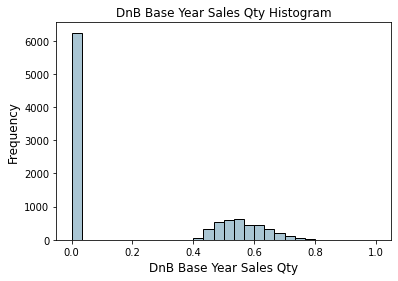

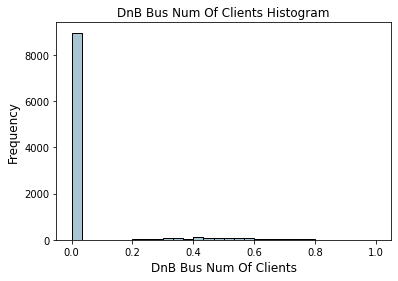

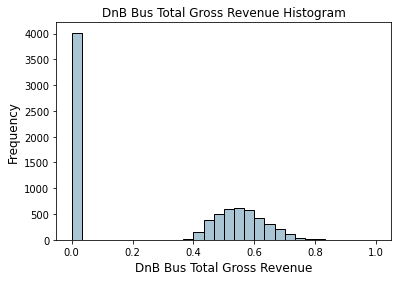

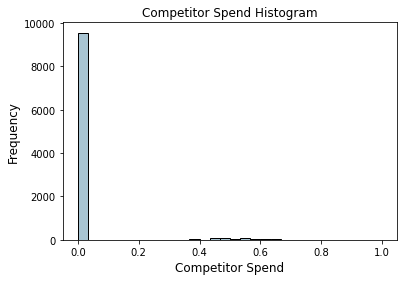

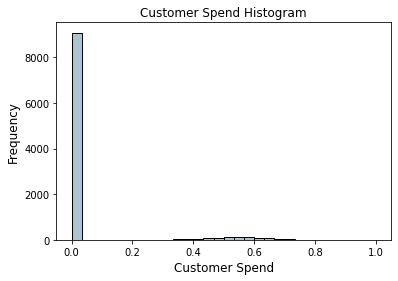

In [43]:
col_list = ['DnB Base Year Sales Qty','DnB Bus Num Of Clients',
            'DnB Bus Total Gross Revenue','Competitor Spend','Customer Spend']

for i in col_list:
    histogram(i)

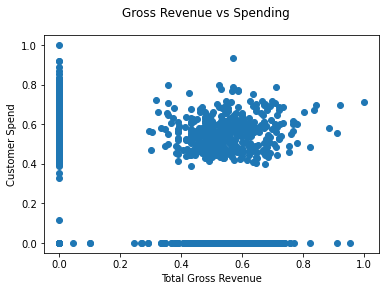

In [44]:
x = logPlusOne_Normalize(customer['Customer Spend'])
y = logPlusOne_Normalize(customer['DnB Bus Total Gross Revenue']) 

fig = plt.figure()
fig.suptitle('Gross Revenue vs Spending')
plt.scatter(x, y)
plt.xlabel("Total Gross Revenue")
plt.ylabel("Customer Spend")
plt.show()
# fig.savefig('test.jpg')

In [45]:
# Region dictionary
ca_prov = ['Alberta','British Columbia','Manitoba','New Brunswick','Newfoundland and Labrador','Northwest Territories',
           'Nova Scotia','Nunavut','Ontario','Prince Edward Island','Quebec','Saskatchewan','Yukon']

mx_state = ['Aguascalientes','Baja California','Baja California Sur','Campeche','Coahuila','Colima','Chiapas','Chihuahua',
            'Durango','Mexico City','Guanajuato','Guerrero','Hidalgo','Jalisco','Mexico','Michoacan','Morelos','Nayarit',
            'Nuevo León','Oaxaca','Puebla','Queretaro','Quintana Roo','San Luis Potosi','Sinaloa','Sonora','Tabasco',
            'Tamaulipas','Tlaxcala','Veracruz','Yucatán','Zacatecas']

region = {'West':['Washington','Oregon','California','Idaho','Nevada','Utah','Montana','Wyoming','Colorado','Alaska','Havaii'],
          'Midwest':['North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri','Wisconsin','Illinois','Michigan','Indiana','Ohio'],
          'Northeast':['Maine','New York','Pennsylvania','Vermont','New Hampshire','Massachusetts','Rhode Island','Connecticut','New Jersey','Delaware','Maryland'],
          'Southeast':['West Virginia','Virginia','District of Columbia','kentucky','North Carolina','Tennessee','South Carolina','Arkansas','Georgia','Alabama','Mississippi','Louisiana','Florida'],
          'Southwest':['Arizona','New Mexico','Texas','Oklahoma'],
          'other':['American Samoa','Guam','Northern Mariana Islands','Puerto Rico','Virgin Islands'],
          'Canada':ca_prov,
          'Mexico':mx_state}

In [46]:
# lower case region dictionary
region_dict = defaultdict(list)
for key, value in region.items():
    value_lower = []
    for val in value:
        value_lower.append(val.lower())
    region_dict[key] = value_lower
    
    
# get region for state/province
def get_region(row, column_name): 
    val = row[column_name]
    val_lower = val.lower()
    for _,(key,value) in enumerate(list(region_dict.items())):
        for j in range(len(value)):
            if val_lower in value[j]: 
                return key
    else:
        return 'unknown'

In [47]:
region_cols = ['State/Province']
region_df = customer.copy()
for col in region_cols:
    if col in region_df.columns.values:
        region_df[col+'_region'] = region_df.apply(lambda row: get_region(row, col),axis=1)
        region_df = region_df.drop(columns = col)

In [48]:
# Replace String to numerical

region_df['region'] = pd.factorize(region_df['State/Province_region'])[0] + 1

In [49]:
region_df.tail(5)

,DnB Base Year Sales Qty,DnB Bus Num Of Clients,DnB Bus Total Gross Revenue,Competitor Spend,Customer Spend,DnB Primary NAICS Industry Sub Segment Level2 Description,State/Province_region,region
9995,32323350,0,25517538.00,0.00,0,Non-Targeted,Southeast,2
9996,0,0,0.00,0.00,0,NaN,Southeast,2
9997,0,0,-9999999999999.99,0.00,0,Industrial Distributor,Northeast,6
9998,0,0,225134.00,0.00,0,Dealerships,West,3
9999,0,0,-9999999999999.99,0.00,0,Industrial Distributor,Midwest,4


In [50]:
code_df = region_df.groupby(['State/Province_region', 'region']).size().reset_index(name='Freq').sort_values(by=['region'])
code_df

,State/Province_region,region,Freq
4,Southwest,1,1285
3,Southeast,2,1794
5,West,3,2790
1,Midwest,4,1560
6,unknown,5,1251
2,Northeast,6,1305
0,Canada,7,15


In [51]:
# Check whether the sum of Freq equals to the number of rows
code_df['Freq'].sum() 

10000

<b> Gross Revenue vs Spending in each region </b>

In [52]:
x = logPlusOne_Normalize(region_df['DnB Bus Total Gross Revenue'])
y = logPlusOne_Normalize(region_df['Customer Spend'])

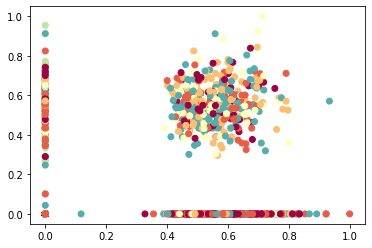

In [53]:
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_with_legend.html
fig,ax = plt.subplots()
scatter = ax.scatter(x, y, c = region_df['region'], cmap="Spectral")

### k-Means clustering algorithm
 1. Randomly placing k centroids, one for each cluster.
 2. Calculate the distance of each point from each centroid.
 3. Assign each data point (feature values) to its nearest centroid, creating a cluster.
 4. Recalculate the position of the k centroids.
 5. Repeat steps 2–4 until the centroids no longer move.


In [100]:
region_df2 = region_df.drop(['DnB Bus Num Of Clients', 
                             'Competitor Spend',
                             'DnB Primary NAICS Industry Sub Segment Level2 Description', 
                             'State/Province_region'], axis = 1)

In [86]:
region_df2

,DnB Base Year Sales Qty,DnB Bus Total Gross Revenue,Customer Spend,region
0,0,0.00,0,1
1,0,0.00,0,1
2,0,-9999999999999.99,0,1
3,2302644,2127273.00,0,1
4,8061618,8061618.00,0,1
...,...,...,...,...
9995,32323350,25517538.00,0,2
9996,0,0.00,0,2
9997,0,-9999999999999.99,0,6
9998,0,225134.00,0,3


In [87]:
region_df2 = region_df2.clip(lower = 0)

In [88]:
region_df2

,DnB Base Year Sales Qty,DnB Bus Total Gross Revenue,Customer Spend,region
0,0,0.00,0,1
1,0,0.00,0,1
2,0,0.00,0,1
3,2302644,2127273.00,0,1
4,8061618,8061618.00,0,1
...,...,...,...,...
9995,32323350,25517538.00,0,2
9996,0,0.00,0,2
9997,0,0.00,0,6
9998,0,225134.00,0,3


In [89]:
for col in region_df2:
    region_df2[col] = logPlusOne_Normalize(region_df2[col])

In [90]:
region_df2.describe()

,DnB Base Year Sales Qty,DnB Bus Total Gross Revenue,Customer Spend,region
count,10000.00,10000.00,10000.00,10000.00
mean,0.21,0.22,0.05,0.51
std,0.28,0.28,0.16,0.28
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.29
50%,0.00,0.00,0.00,0.50
75%,0.52,0.52,0.00,0.79
max,1.00,1.00,1.00,1.00


In [91]:
X = region_df2

In [92]:
X

,DnB Base Year Sales Qty,DnB Bus Total Gross Revenue,Customer Spend,region
0,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00
3,0.59,0.58,0.00,0.00
4,0.64,0.64,0.00,0.00
...,...,...,...,...
9995,0.70,0.68,0.00,0.29
9996,0.00,0.00,0.00,0.29
9997,0.00,0.00,0.00,0.90
9998,0.00,0.49,0.00,0.50


In [111]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 

distortions = [] #  It is calculated as the average of the squared distances from the cluster centers of the respective clusters.
inertias = [] # It is the sum of squared distances of samples to their closest cluster center.
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters = k).fit(X) 
    #y_kmeans = kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

In [112]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

1 : 0.4838696240078216
2 : 0.29096495508202286
3 : 0.2351197015139284
4 : 0.2047626274369874
5 : 0.1887914516424888
6 : 0.17853179230389518
7 : 0.15208063533017752
8 : 0.13927021518496283
9 : 0.12941336779827795


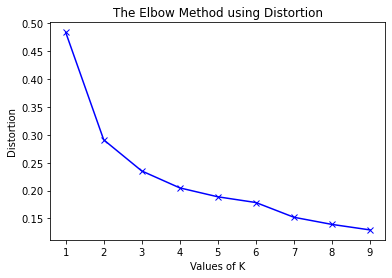

In [113]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [114]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 

1 : 2559.9427716628193
2 : 1170.8980267171355
3 : 832.0294312517098
4 : 652.853918306349
5 : 556.6627854617471
6 : 441.61357799497824
7 : 381.08805668415533
8 : 316.49976997049725
9 : 268.9290478230743


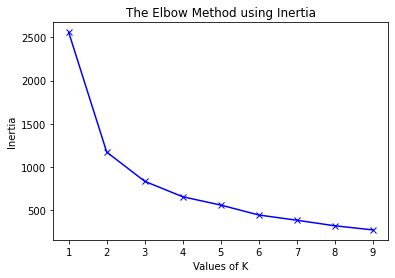

In [115]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [123]:
y_kmeans = pd.DataFrame(kmeanModel.fit_predict(X), columns = ['Cluster'])

In [124]:
y_kmeans

,Cluster
0,3
1,3
2,3
3,1
4,1
...,...
9995,1
9996,4
9997,7
9998,0


In [131]:
X['Cluster'] = y_kmeans

In [132]:
X

,DnB Base Year Sales Qty,DnB Bus Total Gross Revenue,Customer Spend,region,Cluster
0,0.00,0.00,0.00,0.00,3
1,0.00,0.00,0.00,0.00,3
2,0.00,0.00,0.00,0.00,3
3,0.59,0.58,0.00,0.00,1
4,0.64,0.64,0.00,0.00,1
...,...,...,...,...,...
9995,0.70,0.68,0.00,0.29,1
9996,0.00,0.00,0.00,0.29,4
9997,0.00,0.00,0.00,0.90,7
9998,0.00,0.49,0.00,0.50,0


In [116]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

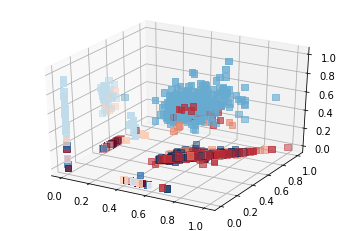

In [137]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(X['DnB Base Year Sales Qty'])
y = np.array(X['DnB Bus Total Gross Revenue'])
z = np.array(X['Customer Spend'])
w = np.array(X['region'])

ax.scatter(x,y,z,w, marker="s", c=X["Cluster"], s=40, cmap="RdBu")

plt.show()

In [138]:
ax.scatter?